In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [80]:
def fit_classifier(alg, X_train, X_test, y_train, y_test):
      
    alg.fit(X_train, y_train)
    y_pred_train = alg.predict(X_train)
    y_pred_test = alg.predict(X_test)
    cm = metrics.confusion_matrix(y_test, y_pred_test, labels=None)
    met = {
        "ACC_train":  metrics.accuracy_score(y_pred_train, y_train),
        "ACC_test": metrics.accuracy_score(y_pred_test, y_test),
        "P_train":    metrics.precision_score(y_pred_train, y_train),
        "P_test":   metrics.precision_score(y_pred_test, y_test),
        "R_train":    metrics.recall_score(y_pred_train, y_train),
        "R_test":   metrics.recall_score(y_pred_test, y_test),
        "F1_train":   metrics.f1_score(y_pred_train, y_train),
        "F1_test":  metrics.f1_score(y_pred_test, y_test)
        }
    return met, cm

In [6]:
heart_failure_data = pd.read_csv("data/heart_failure_clinical_records_dataset.csv")
heart_failure_data = heart_failure_data.drop(columns = 'time')
heart_failure_data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,1.00000


In [7]:
X = heart_failure_data.iloc[:, :-1]
m = X.mean()
s = X.std()
X_std = (X - m)/s
X_std.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,1.190949,-0.869647,0.000165,-0.846161,-1.527998,1.356997,1.678834e-02,0.489237,-1.501519,0.734457,-0.686531
1,-0.490457,-0.869647,7.502063,-0.846161,-0.007065,-0.734457,7.523048e-09,-0.284076,-0.141739,0.734457,-0.686531
2,0.350246,-0.869647,-0.449186,-0.846161,-1.527998,-0.734457,-1.036336e+00,-0.090748,-1.728149,0.734457,1.451727
3,-0.910808,1.146046,-0.485257,-0.846161,-1.527998,-0.734457,-5.455595e-01,0.489237,0.084892,0.734457,-0.686531
4,0.350246,1.146046,-0.434757,1.177856,-1.527998,-0.734457,6.507077e-01,1.262550,-4.674340,-1.356997,-0.686531


In [127]:
y = heart_failure_data.iloc[:, -1]
y.value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

In [10]:
heart_failure_data_without_outl = pd.read_csv("data/heart_failure_data_without_outl.csv")
heart_failure_data_without_outl = heart_failure_data_without_outl.drop(columns = 'time')
heart_failure_data_without_outl.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,60.972621,0.435714,456.725000,0.417857,37.835714,0.360714,258820.066536,1.275393,136.825000,0.653571,0.314286,0.307143
std,11.815337,0.496738,537.107566,0.494089,11.470461,0.481068,85605.349916,0.615743,3.924203,0.476684,0.465062,0.462135
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,124.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,114.500000,0.000000,30.000000,0.000000,210750.000000,0.900000,134.000000,0.000000,0.000000,0.000000
50%,60.000000,0.000000,239.500000,0.000000,38.000000,0.000000,261000.000000,1.100000,137.000000,1.000000,0.000000,0.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,302000.000000,1.400000,140.000000,1.000000,1.000000,1.000000
max,95.000000,1.000000,2794.000000,1.000000,65.000000,1.000000,543000.000000,4.400000,148.000000,1.000000,1.000000,1.000000


In [11]:
X_outl = heart_failure_data_without_outl.iloc[:, :-1]
m = X_outl.mean()
s = X_outl.std()
X_outl_std = (X_outl - m)/s
X_outl_std.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,1.187218,-0.877151,0.233240,-0.845711,-1.554926,1.32889,0.072191,1.014397,-1.739206,0.726747,-0.675793
1,0.340860,-0.877151,-0.578515,-0.845711,-1.554926,-0.74982,-1.131005,0.039963,-1.994035,0.726747,1.474458
2,-0.928676,1.135983,-0.643679,-0.845711,-1.554926,-0.74982,-0.570292,1.014397,0.044595,0.726747,-0.675793
3,2.456754,1.135983,-0.762836,-0.845711,0.188683,1.32889,-0.640381,1.339208,-1.229549,0.726747,1.474458
4,1.187218,1.135983,-0.392333,-0.845711,-1.990828,-0.74982,-1.539858,-0.122442,0.044595,0.726747,-0.675793


In [12]:
y_outl = heart_failure_data_without_outl.iloc[:, -1]
y_outl.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [21]:
#Create train and validation datasets for default data and the one without outliers
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
X_std_train, X_std_val, y_std_train, y_std_val = train_test_split(X_std, y, test_size = 0.2)
X_outl_train, X_outl_val, y_outl_train, y_outl_val = train_test_split(X_outl, y_outl, test_size = 0.2)
X_outl_std_train, X_outl_std_val, y_outl_std_train, y_outl_std_val = train_test_split(X_outl_std, y_outl, test_size = 0.2)

In [ ]:
#kNN model

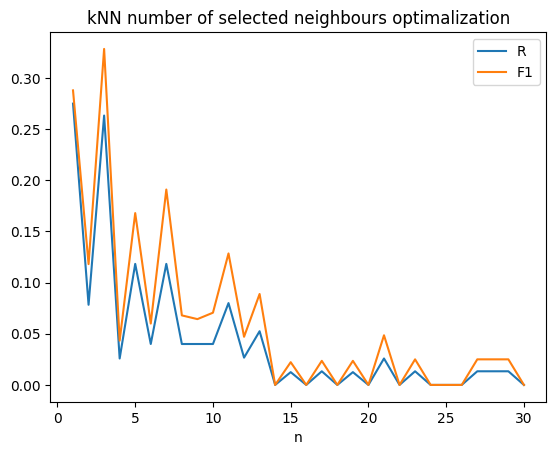

,R,F1
3,0.263333,0.328458


In [90]:
kNN_opt = pd.DataFrame()

for i in range(1,31):
    cv = cross_validate(KNeighborsClassifier(n_neighbors=i), X_std_train, y_std_train, cv=5, scoring = ['recall', 'f1'])
    met_opt = pd.DataFrame({"R": cv['test_recall'].mean(), "F1": cv['test_f1'].mean()}, index = [i])
    kNN_opt = pd.concat([met_opt, kNN_opt])
    
kNN_opt.plot.line(x=None, y=None, xlabel = "n")
plt.title("kNN number of selected neighbours optimalization")
plt.show()
kNN_opt.loc[kNN_opt['F1'] == kNN_opt['F1'].max()]

In [87]:
params = ["knn n=3"]
met, cm = fit_classifier(KNeighborsClassifier(n_neighbors = 3), X_std_train, X_std_val, y_std_train, y_std_val)
df_results = pd.DataFrame(met, index=params)
df_results

,ACC_train,ACC_test,P_train,P_test,R_train,R_test,F1_train,F1_test
knn n=3,0.794979,0.666667,0.539474,0.25,0.745455,0.5,0.625954,0.333333


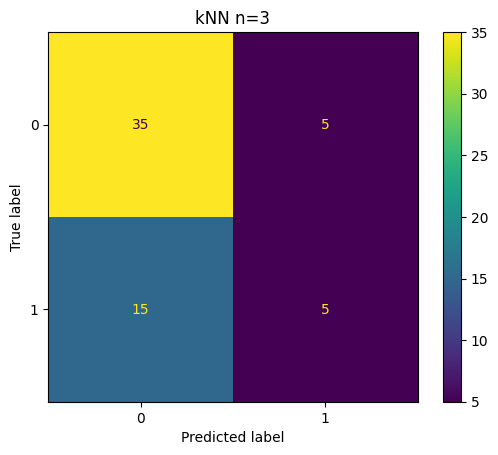

In [82]:
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()
plt.title("kNN n=3")
plt.show()

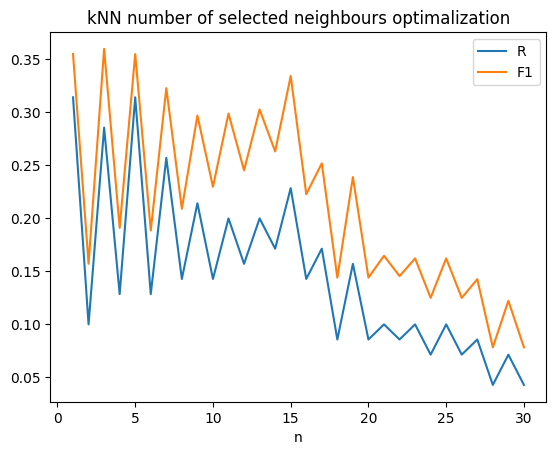

,R,F1
3,0.285714,0.359957


In [89]:
kNN_opt = pd.DataFrame()

for i in range(1,31):
    cv = cross_validate(KNeighborsClassifier(n_neighbors=i), X_outl_std_train, y_outl_std_train, cv=5, 
                        scoring = ['recall', 'f1'])
    met_opt = pd.DataFrame({"R": cv['test_recall'].mean(), "F1": cv['test_f1'].mean()}, index = [i])
    kNN_opt = pd.concat([met_opt, kNN_opt])
    
kNN_opt.plot.line(x=None, y=None, xlabel = "n")
plt.title("kNN number of selected neighbours optimalization")
plt.show()
kNN_opt.loc[kNN_opt['F1'] == kNN_opt['F1'].max()]

In [88]:
met, cm = fit_classifier(KNeighborsClassifier(n_neighbors = 3), X_outl_std_train, X_outl_std_val, 
                         y_outl_std_train, y_outl_std_val)
res = pd.DataFrame(met, index = ["knn with outl n=3"])
df_results = pd.concat([res, df_results])
df_results

,ACC_train,ACC_test,P_train,P_test,R_train,R_test,F1_train,F1_test
knn with outl n=3,0.803571,0.714286,0.514286,0.3125,0.782609,0.5,0.620690,0.384615
knn n=3,0.794979,0.666667,0.539474,0.2500,0.745455,0.5,0.625954,0.333333


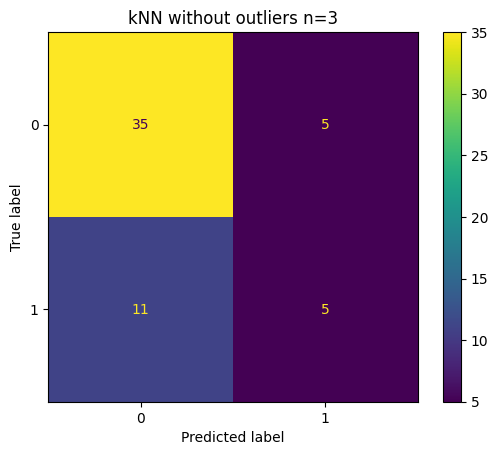

In [92]:
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()
plt.title("kNN without outliers n=3")
plt.show()

In [ ]:
#Random forest model

In [113]:
cv = cross_validate(RandomForestClassifier(), X_std_train, y_std_train, cv=5, scoring = ['recall', 'f1'])
print('recall score:', cv['test_recall'].mean().round(4),'\n' 
      'f1 score:', cv['test_f1'].mean().round(4))

recall score: 0.3817 
f1 score: 0.439


In [114]:
met, cm = fit_classifier(RandomForestClassifier(), X_std_train, X_std_val, y_std_train, y_std_val)
res = pd.DataFrame(met, index = ["Random Forest"])
df_results = pd.concat([res, df_results])
df_results

,ACC_train,ACC_test,P_train,P_test,R_train,R_test,F1_train,F1_test
Random Forest,1.000000,0.783333,1.000000,0.5500,1.000000,0.733333,1.000000,0.628571
knn with outl n=3,0.803571,0.714286,0.514286,0.3125,0.782609,0.500000,0.620690,0.384615
knn n=3,0.794979,0.666667,0.539474,0.2500,0.745455,0.500000,0.625954,0.333333


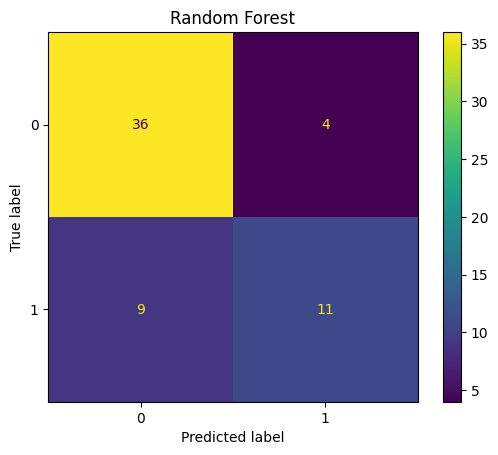

In [115]:
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()
plt.title("Random Forest")
plt.show()

In [117]:
cv = cross_validate(RandomForestClassifier(), X_outl_std_train, y_outl_std_train, cv=5, scoring = ['recall', 'f1'])
print('recall score:', cv['test_recall'].mean().round(4),'\n' 
      'f1 score:', cv['test_f1'].mean().round(4))

recall score: 0.4857 
f1 score: 0.5503


In [118]:
met, cm = fit_classifier(RandomForestClassifier(), X_outl_std_train, X_outl_std_val, 
                         y_outl_std_train, y_outl_std_val)
res = pd.DataFrame(met, index = ["Random Forest without outliers"])
df_results = pd.concat([res, df_results])
df_results

,ACC_train,ACC_test,P_train,P_test,R_train,R_test,F1_train,F1_test
Random Forest without outliers,1.000000,0.678571,1.000000,0.4375,1.000000,0.437500,1.000000,0.437500
Random Forest,1.000000,0.783333,1.000000,0.5500,1.000000,0.733333,1.000000,0.628571
knn with outl n=3,0.803571,0.714286,0.514286,0.3125,0.782609,0.500000,0.620690,0.384615
knn n=3,0.794979,0.666667,0.539474,0.2500,0.745455,0.500000,0.625954,0.333333


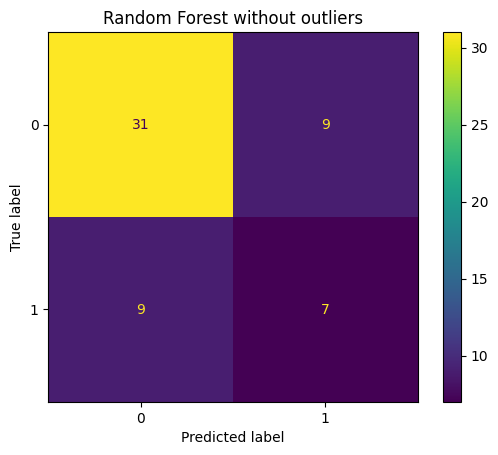

In [119]:
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()
plt.title("Random Forest without outliers")
plt.show()

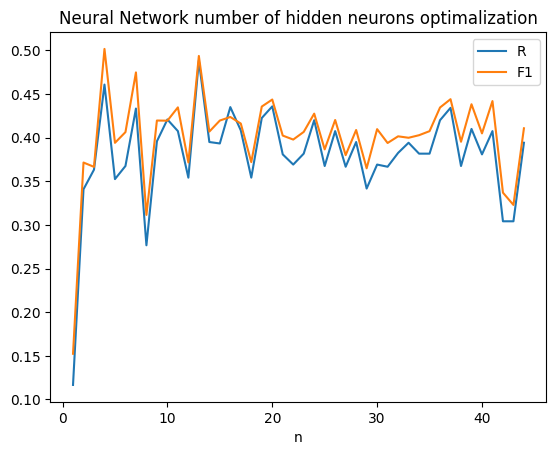

,R,F1
4,0.460833,0.501675


In [123]:
NNet_opt = pd.DataFrame()

for i in range(1,45):
    cv = cross_validate(MLPClassifier(hidden_layer_sizes=(i,), max_iter = 4000), X_std_train, y_std_train, cv=5, 
                        scoring = ['recall', 'f1'])
    met_opt = pd.DataFrame({"R": cv['test_recall'].mean(), "F1": cv['test_f1'].mean()}, index = [i])
    NNet_opt = pd.concat([met_opt, NNet_opt])
    
NNet_opt.plot.line(x=None, y=None, xlabel = "n")
plt.title("Neural Network number of hidden neurons optimalization")
plt.show()
NNet_opt.loc[NNet_opt['F1'] == NNet_opt['F1'].max()]

In [121]:
met, cm = fit_classifier(MLPClassifier(hidden_layer_sizes=(41,), max_iter = 4000), X_std_train, X_std_val, 
                         y_std_train, y_std_val)
res = pd.DataFrame(met, index = ["NNet hidden = 41"])
df_results = pd.concat([res, df_results])
df_results

,ACC_train,ACC_test,P_train,P_test,R_train,R_test,F1_train,F1_test
NNet hidden = 41,0.991632,0.733333,0.986842,0.6500,0.986842,0.590909,0.986842,0.619048
Random Forest without outliers,1.000000,0.678571,1.000000,0.4375,1.000000,0.437500,1.000000,0.437500
Random Forest,1.000000,0.783333,1.000000,0.5500,1.000000,0.733333,1.000000,0.628571
knn with outl n=3,0.803571,0.714286,0.514286,0.3125,0.782609,0.500000,0.620690,0.384615
knn n=3,0.794979,0.666667,0.539474,0.2500,0.745455,0.500000,0.625954,0.333333


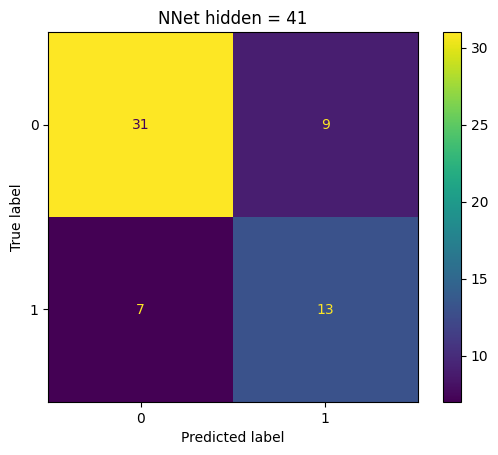

In [122]:
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()
plt.title("NNet hidden = 41")
plt.show()

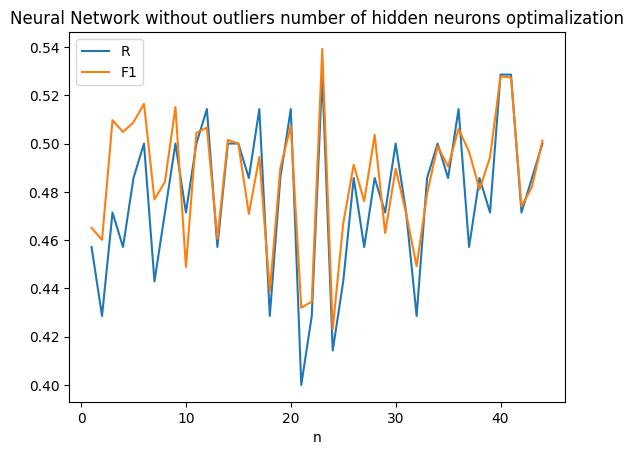

,R,F1
23,0.528571,0.539202


In [124]:
NNet_opt = pd.DataFrame()

for i in range(1,45):
    cv = cross_validate(MLPClassifier(hidden_layer_sizes=(i,), max_iter = 4000), X_outl_std_train, y_outl_std_train, cv=5, 
                        scoring = ['recall', 'f1'])
    met_opt = pd.DataFrame({"R": cv['test_recall'].mean(), "F1": cv['test_f1'].mean()}, index = [i])
    NNet_opt = pd.concat([met_opt, NNet_opt])
    
NNet_opt.plot.line(x=None, y=None, xlabel = "n")
plt.title("Neural Network without outliers number of hidden neurons optimalization")
plt.show()
NNet_opt.loc[NNet_opt['F1'] == NNet_opt['F1'].max()]

In [125]:
met, cm = fit_classifier(MLPClassifier(hidden_layer_sizes=(23,), max_iter = 4000), X_outl_std_train, X_outl_std_val, 
                         y_outl_std_train, y_outl_std_val)
res = pd.DataFrame(met, index = ["NNet without outliers hidden = 23"])
df_results = pd.concat([res, df_results])
df_results

,ACC_train,ACC_test,P_train,P_test,R_train,R_test,F1_train,F1_test
NNet without outliers hidden = 23,0.955357,0.732143,0.914286,0.5000,0.941176,0.533333,0.927536,0.516129
NNet hidden = 41,0.991632,0.733333,0.986842,0.6500,0.986842,0.590909,0.986842,0.619048
Random Forest without outliers,1.000000,0.678571,1.000000,0.4375,1.000000,0.437500,1.000000,0.437500
Random Forest,1.000000,0.783333,1.000000,0.5500,1.000000,0.733333,1.000000,0.628571
knn with outl n=3,0.803571,0.714286,0.514286,0.3125,0.782609,0.500000,0.620690,0.384615
knn n=3,0.794979,0.666667,0.539474,0.2500,0.745455,0.500000,0.625954,0.333333


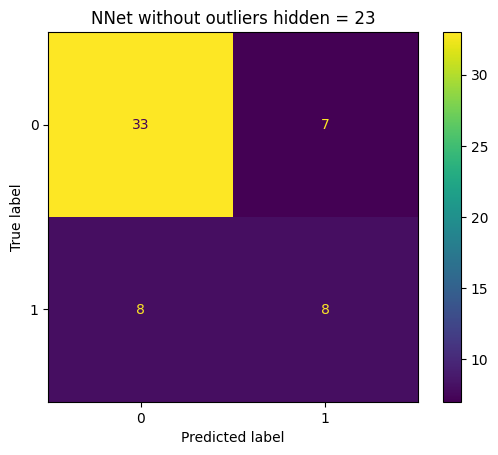

In [126]:
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()
plt.title("NNet without outliers hidden = 23")
plt.show()